# Linear Regression Model for Housing Price Prediction

This notebook implements and evaluates a Linear Regression model for predicting house prices. As one of the simplest and most widely used regression algorithms, Linear Regression serves as a strong baseline for comparison with more advanced models. It assumes a linear relationship between input features and the target variable, making it interpretable and computationally efficient.

The goals of this notebook are:
- Load preprocessed features and the target variable  
- Train a Linear Regression model  
- Evaluate performance using regression metrics  
- Visualize predictions and residuals  
- Save validation predictions for ensemble use or reporting  


### Importing Dependencies

We load all necessary libraries for model training, evaluation, and visualization.  
- NumPy and Pandas handle basic data operations.  
- Scikit-learn provides the Linear Regression model and evaluation metrics.  
- Matplotlib and Seaborn are used for generating diagnostic plots.  


In [1]:
import numpy as np
import pandas as pd

from scipy import sparse

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import matplotlib.pyplot as plt
import seaborn as sns

### Loading Preprocessed Training and Test Data

We load the sparse matrices generated in the preprocessing notebook. Using sparse matrices helps handle the expanded feature space created by one-hot encoding without consuming excessive memory.  

We also load the `SalePrice` target vector. These inputs are now ready for machine learning models.

In [2]:
# Load preprocessed training/test features and target array

X = sparse.load_npz("../data/X_processed.npz")

X_test_kaggle = sparse.load_npz("../data/X_test_processed.npz")

y = pd.read_csv("../data/y.csv")["SalePrice"].values

In [3]:
# dimensionality of the feature matrix 
X.shape

(1460, 289)

In [4]:
#dimensionality of the target vector
y.shape

(1460,)

### Splitting Data into Training and Validation Sets

To fairly evaluate the model, we split the dataset into:
- **80% training data**  
- **20% validation data**

The validation set acts as unseen data to estimate real-world model performance. A fixed `random_state` ensures reproducibility.


In [5]:
# Split data into training and validation sets (80/20 split)
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [6]:
# Display shapes of the train feature matrices
X_train.shape

(1168, 289)

In [7]:
# Display shapes of the validation feature matrices
X_val.shape

(292, 289)

### Training the Linear Regression Model

Linear Regression models the relationship between input features and the target variable by fitting a linear equation (hyperplane) that minimizes the sum of squared differences between the predicted and actual values. It provides an interpretable baseline, allowing us to understand feature contributions and serves as a reference point for evaluating more complex models.

In [8]:
# Initialize the Linear Regression model
lr = LinearRegression()

# Fit the model on the training data
lr.fit(X_train, y_train)

print("Model trained successfully!")

Model trained successfully!


### Generating Predictions on the Validation Set

Once trained, the model predicts house prices for the validation set. These predictions will be evaluated against ground truth values using standard regression metrics.

In [9]:
y_pred = lr.predict(X_val)

In [10]:
y_pred[:10]

array([159131.71565608, 348108.32919094,  86505.01214664, 174417.15694401,
       317117.41270186,  65731.081317  , 234615.54846757, 146907.00211613,
        57439.63424209, 154439.92717791])

### Evaluating Model Performance

We evaluate the regression performance using:

- **MSE (Mean Squared Error):** Average squared difference between predictions and actual values.  
- **RMSE (Root Mean Squared Error):** Square root of MSE; interpretable in the original price units.  
- **MAE (Mean Absolute Error):** Average absolute difference between predicted and actual values.  
- **R² Score:** Measures how much variance in the target is explained by the model.

Rounded values make results easier to interpret in the final report.


In [11]:
mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print("Linear Regression Performance:")
print(f"RMSE: {rmse:.2f}")
print(f"MSE : {mse:.2f}")
print(f"MAE : {mae:.2f}")
print(f"R²  : {r2:.4f}")

Linear Regression Performance:
RMSE: 29536.15
MSE : 872384078.42
MAE : 18349.90
R²  : 0.8863


## Data Vizualisations

### Residual Plot

Residuals (actual − predicted values) help diagnose model issues:

- If residuals are randomly scattered around zero → linear model assumptions hold.  
- Patterns or funnels indicate non-linearity or heteroscedasticity.  

This plot helps determine whether Linear Regression is suitable or if nonlinear models are needed.

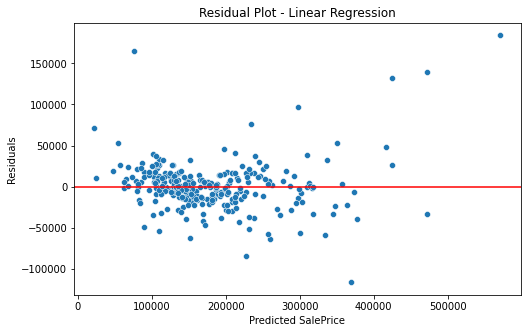

In [12]:
residuals = y_val - y_pred

plt.figure(figsize=(8,5))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red')
plt.xlabel("Predicted SalePrice")
plt.ylabel("Residuals")
plt.title("Residual Plot - Linear Regression")
plt.show()

###  - Plot Analysis
The plot visualizes the **residuals** (vertical axis) against the **predicted values** (horizontal axis). The red line at $y=0$ represents a perfect prediction.

**Key Observations:**
* **The "Funnel" Shape (Heteroscedasticity):** As the `Predicted SalePrice` increases, the vertical spread of the dots widens, creating a distinct cone or funnel shape opening to the right.
* **Implication:** This indicates **heteroscedasticity**. The model's error is not constant; it is reasonably accurate for lower-priced homes but becomes increasingly unreliable and variable as the price increases.
* **Outliers:** Several points are located far from the zero line (particularly around 500k+), representing significant underestimates.
* **Randomness:** For lower prices (0 to 200k), residuals are randomly scattered, suggesting the linear model works well for that segment.



**Conclusion:**
The linear model assumptions **do not fully hold**. While the model captures the general trend, the presence of the funnel shape suggests that a simple Linear Regression is struggling with high-value data points.

### Actual vs Predicted Scatter Plot

A well-performing model should have points aligned close to the diagonal, where predicted values equal actual values. Deviations indicate prediction errors or model bias.


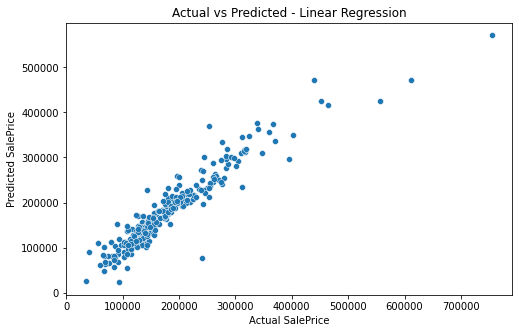

In [13]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=y_val, y=y_pred)
plt.xlabel("Actual SalePrice")
plt.ylabel("Predicted SalePrice")
plt.title("Actual vs Predicted - Linear Regression")
plt.show()

###  - Plot Analysis

This plot compares the **Actual SalePrice** (x-axis) to the **Predicted SalePrice** (y-axis). The ideal scenario for a perfect model would be all points lying exactly on the diagonal $y=x$ line (Actual = Predicted).

**Key Observations:**
* **Overall Fit:** There is a **strong positive linear trend**, indicating the model is generally effective at predicting the sale price.
* **Tight Clustering:** For lower prices (below ~200k), the points are tightly clustered along the imaginary diagonal line, showing high accuracy in this range.
* **Increased Variance/Spread:** As the actual price increases, the points begin to spread out more widely. This confirms the **heteroscedasticity** identified in the residual plot.
* **Underestimation at High End:** For the highest actual values (above 500k), the predicted values consistently fall below the imaginary diagonal. This suggests the model is **underestimating** the prices of the most expensive homes.


**Conclusion:**
The Linear Regression model is useful but exhibits a few issues: it suffers from increasing error variance at higher prices and may be biased toward under-predicting the most expensive homes.

### Saving Validation Predictions

Saving predictions allows us to reuse them later for:
- Model comparison  
- Ensemble stacking  
- Report visualization  

We store them in a NumPy binary file for efficiency.


In [14]:
np.save("../data/lr_val_predictions.npy", y_pred)
print("Validation predictions saved!")

Validation predictions saved!
